In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import statsmodels.api as sm
import os

In [32]:
FILE_DATA_PATH = r"C:\Users\Administrator\Documents\all_my_projects\Wenyi_materials\Wenyi_materials\DataOpenSumer2020\datasets_full"
ENC = "ISO-8859-1"
INDX = pd.IndexSlice
def colormap():
    # colors
    cdict = ['#01437D','#EB7E21', '#9FACB4', '#FBDA11', '#669FD6']#, '#D7D9D6']
    return colors.ListedColormap(cdict, 'indexed')
MY_CMAP = colormap()

In [33]:
print(FILE_DATA_PATH)

C:\Users\Administrator\Documents\all_my_projects\Wenyi_materials\Wenyi_materials\DataOpenSumer2020\datasets_full


In [40]:
for city in os.listdir(FILE_DATA_PATH):
    sub_file = os.path.join(FILE_DATA_PATH, city)
    print(sub_file)
    for table in os.listdir(sub_file):
        table_path = os.path.join(sub_file, table)
#         tt = pd.read_csv(table_path, encoding = ENC)
        print(city, " :", table, " : \n")

C:\Users\Administrator\Documents\all_my_projects\Wenyi_materials\Wenyi_materials\DataOpenSumer2020\datasets_full\London
London  : london_economic_activity.csv  : 

London  : london_infrastructure_spending.csv  : 

London  : london_sports_participation.csv  : 

London  : london_taxpayer_income.csv  : 

London  : london_tickets_for_sale.csv  : 

London  : london_ticket_sales.csv  : 

London  : london_underground_activity.csv  : 

London  : london_underground_station_info.csv  : 

London  : UK_inflation.csv  : 

London  : UK_international-visits.csv  : 

C:\Users\Administrator\Documents\all_my_projects\Wenyi_materials\Wenyi_materials\DataOpenSumer2020\datasets_full\Rio
Rio  : brazil_gdp.csv  : 

Rio  : brazil_international_arrivals.csv  : 

Rio  : brazil_monthly_income.csv  : 

Rio  : brazil_tourism_jobs.csv  : 

Rio  : brazil_unemployment.csv  : 

C:\Users\Administrator\Documents\all_my_projects\Wenyi_materials\Wenyi_materials\DataOpenSumer2020\datasets_full\Vancouver
Vancouver  : gdp_wo

# Load GDP

In [41]:
gdp_path = os.path.join(FILE_DATA_PATH, "Vancouver\gdp_word_bank.csv")
gdp_data = pd.read_csv(gdp_path, encoding = ENC, header = 2)
gdp_data.set_index("Country Name", inplace = True)
gdp_data.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10,NaN
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,9.463542e+10,NaN
Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527808e+10,NaN
Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN


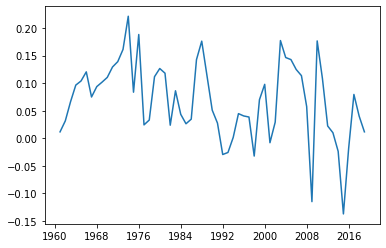

In [42]:
canada = gdp_data.loc["Canada", "1960":"2019"]
cgr = canada.pct_change()
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.plot(cgr)

# Load Business Size

In [43]:
bs_path = os.path.join(FILE_DATA_PATH, "Vancouver/vancouver_business_size.csv")
vbs = pd.read_csv(bs_path, encoding = ENC)
vbs = vbs.loc[vbs.region_code.str.startswith("D")] #filter all RD
mind = pd.MultiIndex.from_product([vbs["year"].unique(), vbs["region_code"].unique(), vbs["business_type"].unique()])
vbs.set_index(["year", "region_code", "business_type"], inplace = True)
vbs.reindex(mind)

unknown one_to_4  \
1999 DR01 Agric., Forestry, Fishing & Hunt               1,227      954   
          Mining & Oil & Gas Extract.                       59       40   
          Utilities                                         13        7   
          Construction                                   3,820    2,046   
          Manufacturing                                    768      701   
...                                                        ...      ...   
2019 DR08 Management of Companies & Enterprises             37        4   
          Admin. & Support, Waste Mgmt. & Remedtn.         572      109   
          Accommodation & Food Services                    117       40   
          Other Services (excl. Public Administration)     736      292   
          Unclassified                                     577      213   

                                                       five_to_9 ten_to_19  \
1999 DR01 Agric., Forestry, Fishing & Hunt                   219       142   
          Mining & Oil & Gas Extract.                          7         3   
          Utilities                                            4         4   
          Construction                                       468       307   
          Manufacturing                                      181       150   
...                                                          ...       ...   
2019 DR08 Management of Companies & Enterprises                1         0   
          Admin. & Support, Waste Mgmt. & Remedtn.            31        19   
          Accommodation & Food Services                       46        40   
          Other Services (excl. Public Administration)        70        48   
          Unclassified                                        21        17   

                                                       twenty_to_49  \
1999 DR01 Agric., Forestry, Fishing & Hunt                       99   
          Mining & Oil & Gas Extract.                           NaN   
          Utilities                                               2   
          Construction                                          154   
          Manufacturing                                         114   
...                                                             ...   
2019 DR08 Management of Companies & Enterprises                   1   
          Admin. & Support, Waste Mgmt. & Remedtn.                9   
          Accommodation & Food Services                          59   
          Other Services (excl. Public Administration)           21   
          Unclassified                                            2   

                                                        fifty_to_199  \
1999 DR01 Agric., Forestry, Fishing & Hunt                      44.0   
          Mining & Oil & Gas Extract.                            4.0   
          Utilities                                              3.0   
          Construction                                          34.0   
          Manufacturing                                         54.0   
...                                                              ...   
2019 DR08 Management of Companies & Enterprises                  1.0   
          Admin. & Support, Waste Mgmt. & Remedtn.               4.0   
          Accommodation & Food Services                         13.0   
          Other Services (excl. Public Administration)           2.0   
          Unclassified                                           0.0   

                                                        two_hundred_plus  
1999 DR01 Agric., Forestry, Fishing & Hunt                           7.0  
          Mining & Oil & Gas Extract.                                1.0  
          Utilities                                                  1.0  
          Construction                                               1.0  
          Manufacturing                                             14.0  
...                                              

In [44]:
#compare !!!
vbs_origin = pd.read_csv(bs_path, encoding = ENC)
vbs_origin

,year,region_code,business_type,unknown,one_to_4,five_to_9,ten_to_19,twenty_to_49,fifty_to_199,two_hundred_plus
0,1999,DR01,"Agric., Forestry, Fishing & Hunt","1,227",954,219,142,99,44.0,7.0
1,1999,DR01,Mining & Oil & Gas Extract.,59,40,7,3,NaN,4.0,1.0
2,1999,DR01,Utilities,13,7,4,4,2,3.0,1.0
3,1999,DR01,Construction,"3,820","2,046",468,307,154,34.0,1.0
4,1999,DR01,Manufacturing,768,701,181,150,114,54.0,14.0
...,...,...,...,...,...,...,...,...,...,...
15185,2019,RD59,Health Care & Social Assistance,18,5,4,1,1,1.0,0.0
15186,2019,RD59,"Arts, Entertainment & Recreation",18,1,2,1,0,0.0,0.0
15187,2019,RD59,Accommodation & Food Services,16,6,1,4,11,0.0,0.0
15188,2019,RD59,Other Services (excl. Public Administration),56,12,8,1,3,0.0,0.0


In [45]:
#transform 1,227 to 1227.0
vbs = vbs.astype(str)
for col in vbs:
    vbs[col] = vbs[col].str.replace(",", "")
vbs = vbs.astype(float)
vbs = vbs.fillna(0)
vbs

unknown  \
year region_code business_type                                           
1999 DR01        Agric., Forestry, Fishing & Hunt               1227.0   
                 Mining & Oil & Gas Extract.                      59.0   
                 Utilities                                        13.0   
                 Construction                                   3820.0   
                 Manufacturing                                   768.0   
...                                                                ...   
2019 DR08        Health Care & Social Assistance                 329.0   
                 Arts, Entertainment & Recreation                141.0   
                 Accommodation & Food Services                   117.0   
                 Other Services (excl. Public Administration)    736.0   
                 Public Administration                             3.0   

                                                               one_to_4  \
year region_code business_type                                            
1999 DR01        Agric., Forestry, Fishing & Hunt                 954.0   
                 Mining & Oil & Gas Extract.                       40.0   
                 Utilities                                          7.0   
                 Construction                                    2046.0   
                 Manufacturing                                    701.0   
...                                                                 ...   
2019 DR08        Health Care & Social Assistance                  102.0   
                 Arts, Entertainment & Recreation                  19.0   
                 Accommodation & Food Services                     40.0   
                 Other Services (excl. Public Administration)     292.0   
                 Public Administration                              0.0   

                                                               five_to_9  \
year region_code business_type                                             
1999 DR01        Agric., Forestry, Fishing & Hunt                  219.0   
                 Mining & Oil & Gas Extract.                         7.0   
                 Utilities                                           4.0   
                 Construction                                      468.0   
                 Manufacturing                                     181.0   
...                                                                  ...   
2019 DR08        Health Care & Social Assistance                    49.0   
                 Arts, Entertainment & Recreation                   13.0   
                 Accommodation & Food Services                      46.0   
                 Other Services (excl. Public Administration)       70.0   
                 Public Administration                               1.0   

                                                               ten_to_19  \
year region_code business_type                                             
1999 DR01        Agric., Forestry, Fishing & Hunt                  142.0   
                 Mining & Oil & Gas Extract.                         3.0   
                 Utilities                                           4.0   
                 Construction                                      307.0   
                 Manufacturing                                     150.0   
...                                                                  ...   
2019 DR08        Health Care & Social Assistance                    29.0   
                 Arts, Entertainment & Recreation                    7.0   
                 Accommodation & Food Services                      40.0   
                 Other Services (excl. Public Administration)       48.0   
                 Public Administration                               2.0   

                                                               twenty_to_49  \
year region_code business_type                                     

## Merge columns 

In [46]:
mgcol_s = ["unknown", "one_to_4", "five_to_9", "ten_to_19", "twenty_to_49"]
mgcol_b = ["fifty_to_199", "two_hundred_plus"]
vbs["small business"] = 0
vbs["large business"] = 0
for col in vbs:
    print(col)
    if col in mgcol_s:
        vbs["small business"] += vbs[col]
    elif col in mgcol_b:
        vbs["large business"] += vbs[col]
vbs_m = vbs[["small business", "large business"]]
vbs_m

unknown
one_to_4
five_to_9
ten_to_19
twenty_to_49
fifty_to_199
two_hundred_plus
small business
large business


small business  \
year region_code business_type                                                  
1999 DR01        Agric., Forestry, Fishing & Hunt                      2641.0   
                 Mining & Oil & Gas Extract.                            109.0   
                 Utilities                                               30.0   
                 Construction                                          6795.0   
                 Manufacturing                                         1914.0   
...                                                                       ...   
2019 DR08        Health Care & Social Assistance                        523.0   
                 Arts, Entertainment & Recreation                       184.0   
                 Accommodation & Food Services                          302.0   
                 Other Services (excl. Public Administration)          1167.0   
                 Public Administration                                    6.0   

                                                               large business  
year region_code business_type                                                 
1999 DR01        Agric., Forestry, Fishing & Hunt                        51.0  
                 Mining & Oil & Gas Extract.                              5.0  
                 Utilities                                                4.0  
                 Construction                                            35.0  
                 Manufacturing                                           68.0  
...                                                                       ...  
2019 DR08        Health Care & Social Assistance                         12.0  
                 Arts, Entertainment & Recreation                         3.0  
                 Accommodation & Food Services                           14.0  
                 Other Services (excl. Public Administration)             2.0  
                 Public Administration                                   16.0  

[3408 rows x 2 columns]

# Analysis-sum over industry

In [47]:
vbs_tr = vbs_m.groupby(level = [0,1]).sum()
vbs_tr_pct = vbs_tr.groupby(level = 1).pct_change().dropna(how = "all")
vbs_tr_pct

small business  large business
year region_code                                
2000 DR01              -0.000267        0.231707
     DR02               0.002877        0.293788
     DR03              -0.003152        0.211957
     DR04               0.000102        0.150838
     DR05              -0.021050        0.090129
...                          ...             ...
2019 DR04               0.000820        0.063559
     DR05              -0.012235        0.003436
     DR06              -0.022266        0.102804
     DR07              -0.021695       -0.014085
     DR08              -0.024844       -0.018750

[160 rows x 2 columns]

In [48]:
cgr_range = cgr.loc["2000":"2019"]

In [49]:
#补协整
def get_resi(series, data):
    endog = series.values
    exog = sm.add_constant(data.loc[series.index.get_level_values(0).astype(str)].values)
    model = sm.OLS(endog, exog)
    res = model.fit()
    return pd.DataFrame(res.resid + res.params[0], columns = series.columns, index = series.index)

In [50]:
vbs_tr_pct_resi = vbs_tr_pct.groupby(level = 1).apply(get_resi, cgr_range)

In [51]:
size = len(vbs_tr_pct.index.get_level_values(1).unique())
size

8

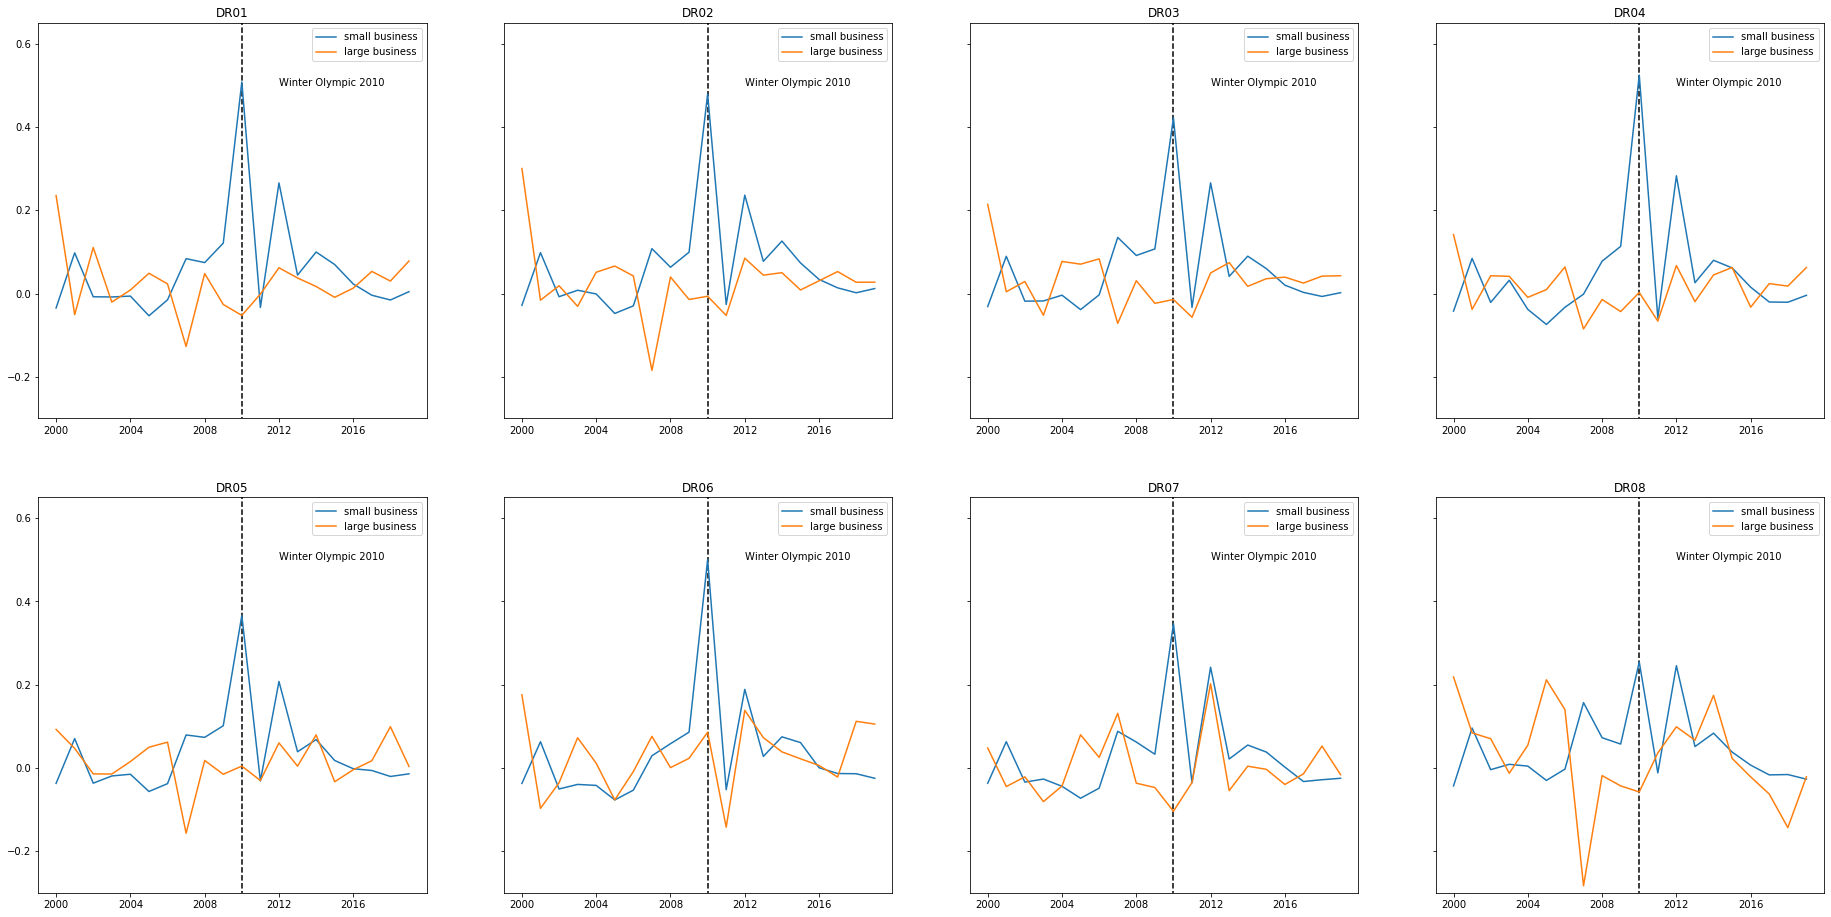

In [52]:
size = len(vbs_tr_pct_resi.index.get_level_values(1).unique())
row, col = 2, 4
fig, ax = plt.subplots(row, col, figsize = (32,16), sharey = True)
num = 0

for name, group in vbs_tr_pct_resi.groupby(level = 1):
    i,j = np.divmod(num, col)
    ax[i,j].xaxis.set_major_locator(plt.MaxNLocator(6))
    ax[i,j].plot(group.index.get_level_values(0), group.values)
    ax[i,j].vlines(2010, -0.5, 1, linestyle = "dashed")
    ax[i,j].annotate("Winter Olympic 2010", [2012,0.5])
    ax[i,j].set_ylim(-0.3, 0.65)
    ax[i,j].set_title(name)
    ax[i,j].legend(group.columns)
    num += 1

# Analysis-sum over region

In [53]:
vbs_ti = vbs_m.groupby(level = [0,2]).sum()
vbs_ti_pct = vbs_ti.groupby(level = 1).pct_change().dropna(how = "all")
vbs_ti_pct

small business  large business
year business_type                                                       
2000 Accom. & Food Services                     -0.031361        0.280861
     Admin. & Sup'rt, Waste Mgmt.               -0.010471        0.175214
     Agric., Forestry, Fishing & Hunt            0.003534        0.079070
     Arts, Entertainment & Recreation            0.007479        0.059524
     Construction                               -0.034347        0.418960
...                                                   ...             ...
2019 Retail Trade                               -0.024269        0.080791
     Transportation & Warehousing (48-49)        0.069411        0.086207
     Unclassified                                0.045044       -0.068376
     Utilities                                  -0.057895        0.157895
     Wholesale Trade                            -0.029988        0.041558

[396 rows x 2 columns]

In [54]:
vbs_ti_pct_resi = vbs_ti_pct.groupby(level = 1).apply(get_resi, cgr_range)

In [55]:
size = len(vbs_ti_pct_resi.index.get_level_values(1).unique())
print(vbs_ti_pct_resi.index.get_level_values(1).unique())
size

Index(['Accom. & Food Services', 'Admin. & Sup'rt, Waste Mgmt.',
       'Agric., Forestry, Fishing & Hunt', 'Arts, Entertainment & Recreation',
       'Construction', 'Educational Services', 'Finance & Insurance',
       'Health Care & Social Assistance', 'Information & Cultural Indust.',
       'Manufacturing', 'Mgmt. of Companies & Enter.',
       'Mining & Oil & Gas Extract.', 'Other Serv's (ex. Public Admin.)',
       'Profes'nl, Scientif. & Tech. Srv', 'Public Administration',
       'Real Estate & Rental & Leasing', 'Retail Trade',
       'Transp. & Warehousing', 'Utilities', 'Wholesale Trade',
       'Accommodation & Food Services',
       'Admin. & Support, Waste Mgmt. & Remedtn.',
       'Agriculture, Forestry, Fishing & Hunting',
       'Information & Cultural Industries',
       'Management of Companies & Enterprises',
       'Mining & Oil & Gas Extraction',
       'Other Services (excl. Public Administration)',
       'Professional, Scientific & Technical Services',
       

30

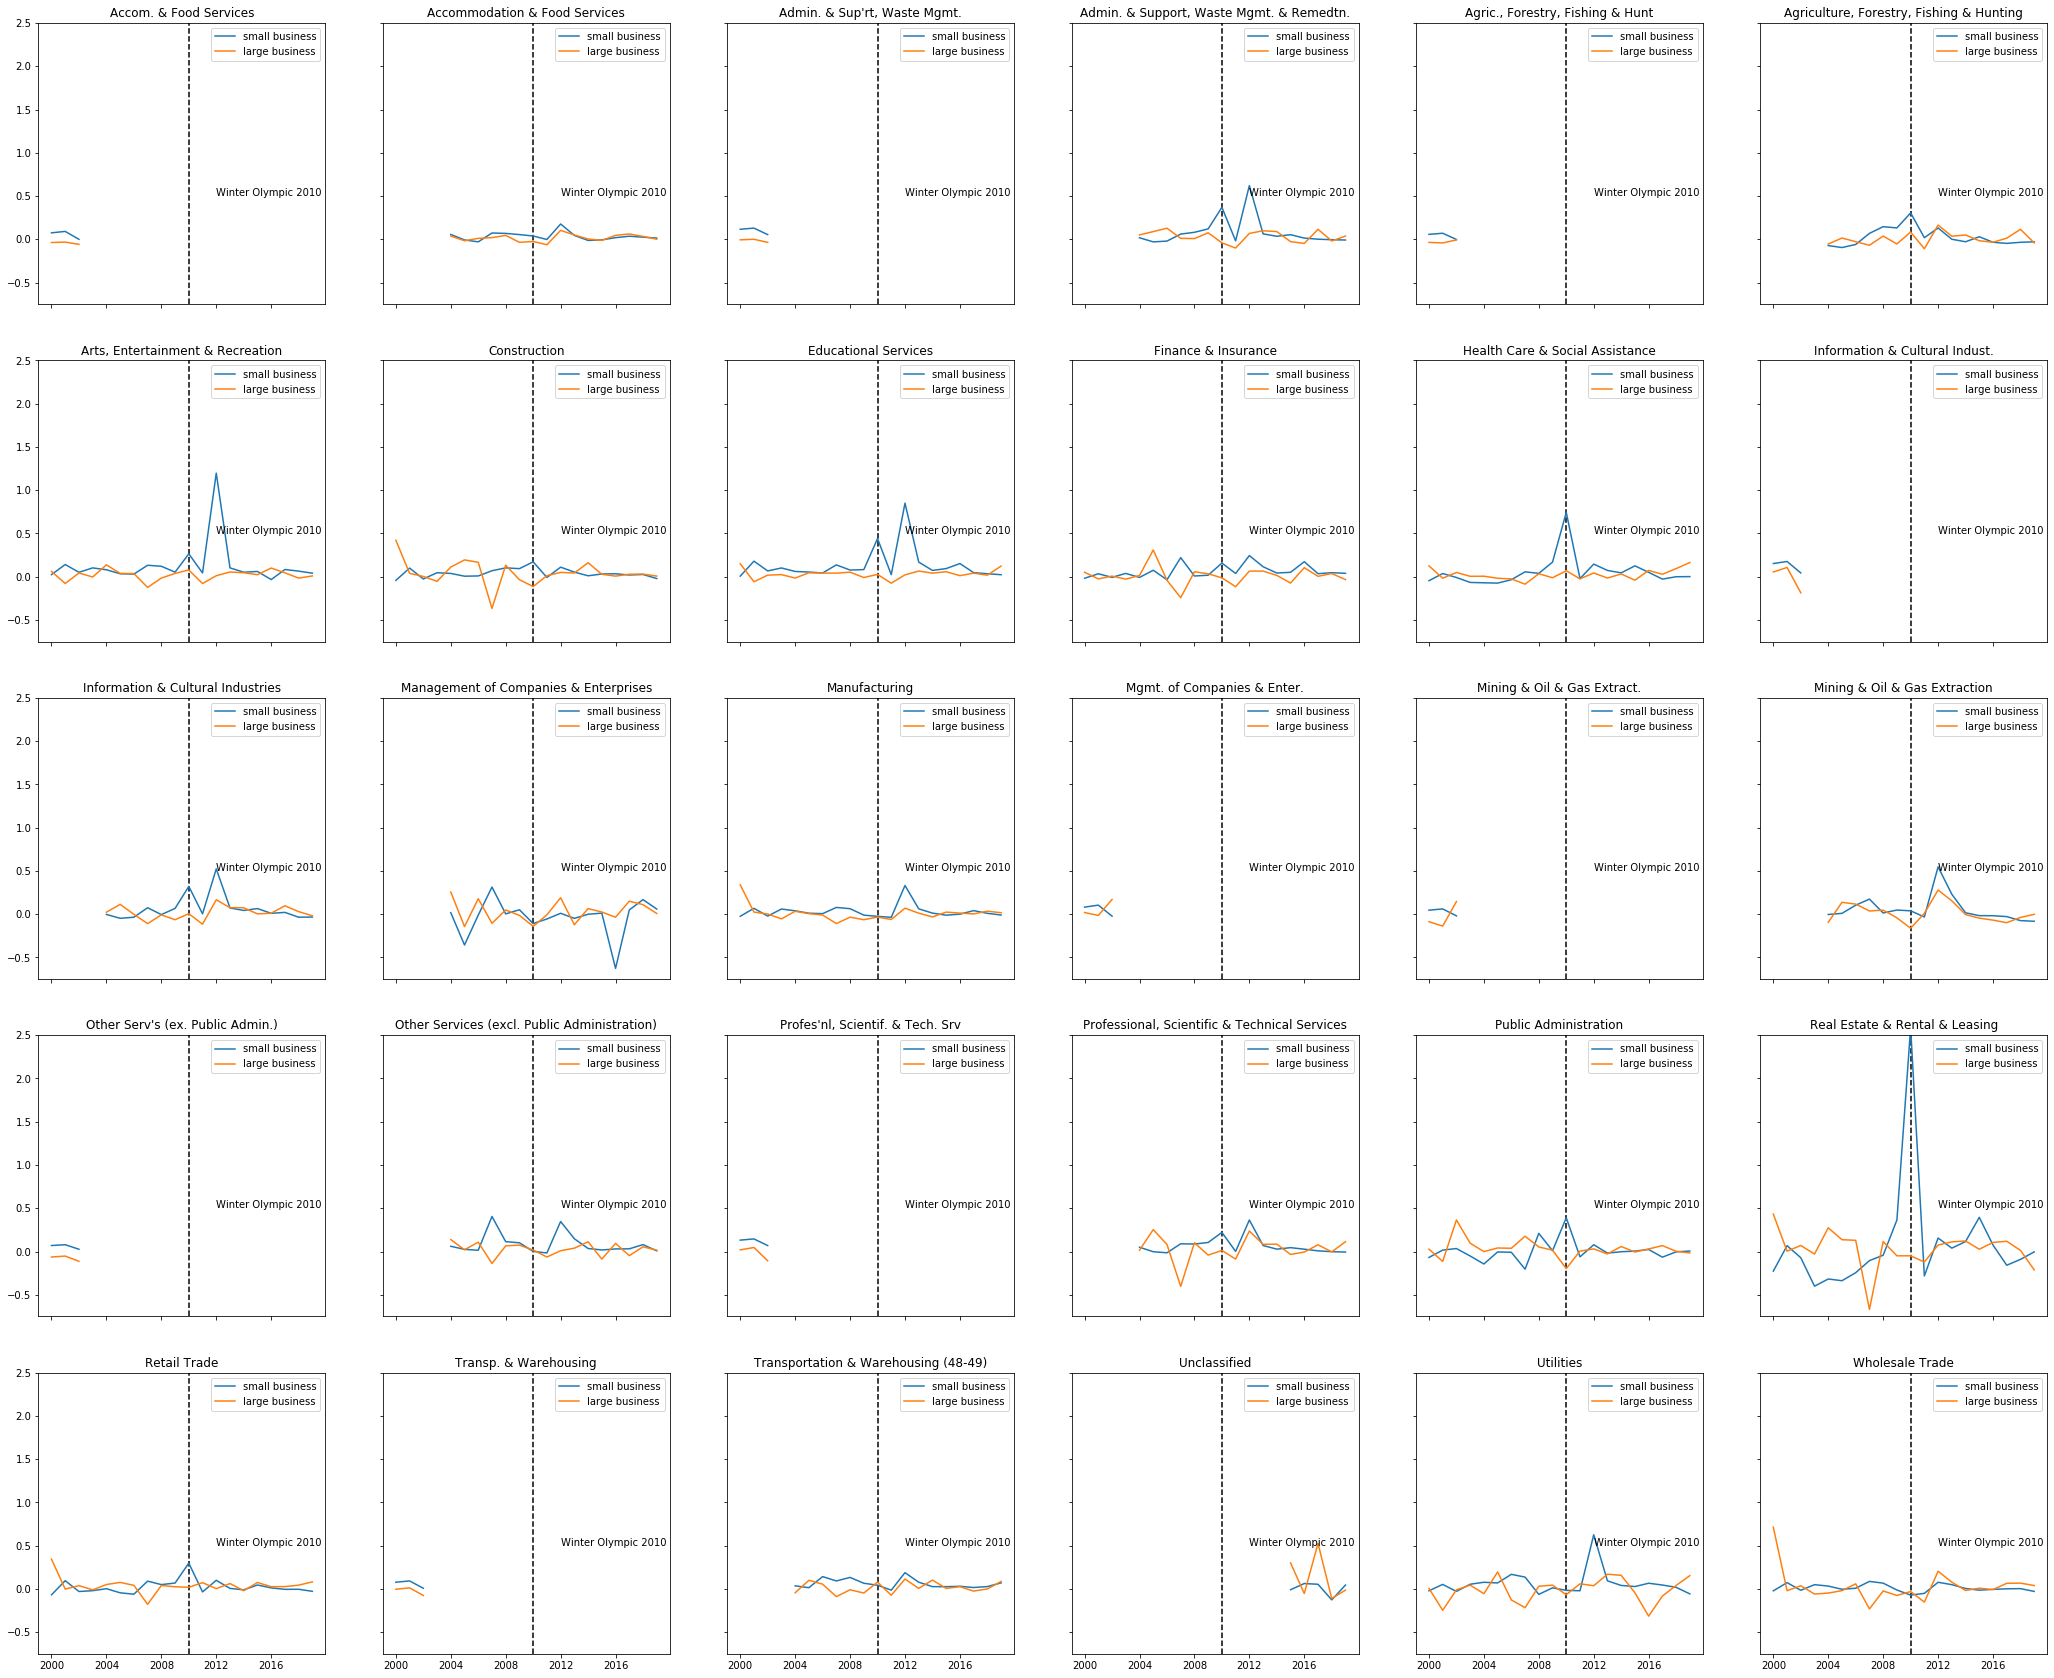

In [56]:
row, col = 5, 6
fig, ax = plt.subplots(row, col, figsize = (36,30), sharey = True, sharex = True)
num = 0

for name, group in vbs_ti_pct_resi.groupby(level = 1):
    i,j = np.divmod(num, col)
    ax[i,j].xaxis.set_major_locator(plt.MaxNLocator(6))
    ax[i,j].plot(group.index.get_level_values(0), group.values)
    ax[i,j].vlines(2010, -0.75, 2.5, linestyle = "dashed")
    ax[i,j].annotate("Winter Olympic 2010", [2012,0.5])
    ax[i,j].set_ylim(-0.75, 2.5)
    ax[i,j].set_title(name)
    ax[i,j].legend(group.columns)
    num += 1